# __RISK__ 


## Assignment 5 - PFDA

### Author: E. Qejvani
***

#### Assignment requirements:

* Write a program (or notebook) called assignment_5_risk (.py or .ipynb)
* The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.
* One battle round is one shake of the attacker and defender dice.

* A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.
*** 

#### Rules of Risk Game:

* In Risk one army fights another. (using 6 sided dice)
* In each battle round, the attacker can put forward up to three of their troops (3 dice).
* The defender can use up to two of their defending troops (2 dice).
* Each side looses troops depending on the following rules:
* The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
* If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
* The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
* If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
***

#### Importing libraries needed for the program

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### Functions

In [10]:
# Function to simulate dice rolls and return the sorted results in descending order.
def roll_dice(num_dice):
    return sorted(np.random.randint(1, 7, num_dice), reverse=True)[:2]      # return 2 top two rolls from random numbers roll between 1(included) and 7(excluded), in descending order.

In [11]:
# Function of a battle round between attacker and defender.
def battle_round(attacker_dice, defender_dice):
    # Setting attacker_losses and defender_losses to zero.
    attacker_losses = 0
    defender_losses = 0

    # Compare dice rolls in pairs (highest to lowest).
    for a, d in zip(attacker_dice, defender_dice):
        if a > d:       # if attacker's dice greater than defender's dice defender is loosing.
            defender_losses += 1
        else:           # attacker is loosing, so add one to his losses.
            attacker_losses += 1

    return attacker_losses, defender_losses     # return battle result

#### Risk - Part 1 - Fix Number of games (1000)

* Number of rounds: 1000
* Write results to a .txt file named ```battle_results.txt ```. This file will hold results of both games simulated in the program.
* Plots a histogram of the results - Distribution of Losses in Individual Battle Rounds.
* Plots a pie chart of final results - Risk Battle Results

In [12]:
# Function to simulate multiple individual battle rounds, in our case 1000 battles.
def simulate_individual_rounds(num_simulations=1000):
    attacker_wins = 0               # set players wins and draws to zero
    defender_wins = 0
    draws = 0

    attacker_losses_list = []       # start games with empty lists for both players.
    defender_losses_list = []
    battle_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    # Open a file to save the results.
    with open("battle_results.txt", "w") as file:
        file.write(f"Results After 1000 Battles:\t\tBattle Time: {battle_time}\n\n")          # Set a header/title to the file.
        
        # Simulate each battle round.
        for i in range(num_simulations):    # num_simulations = 1000
            attacker_dice = roll_dice(3)  # Call roll_dice function for the attacker and roll 3 dice.
            defender_dice = roll_dice(2)  # Call roll_dice function for the defender and roll twice.
            # Call battle_round function - single battle defined above.
            attacker_losses, defender_losses = battle_round(attacker_dice, defender_dice)

            attacker_losses_list.append(attacker_losses)    # append both lists with the results.
            defender_losses_list.append(defender_losses)

            # Determine the winner of the battle round by comparing results.
            if attacker_losses > defender_losses:
                defender_wins += 1
                outcome = "Defender Wins"
            elif defender_losses > attacker_losses:
                attacker_wins += 1
                outcome = "Attacker Wins"
            else:
                draws += 1
                outcome = "Draw"

            # Write the results of each battle to the file.
            file.write(f"Battle {i + 1}: Attacker Dice: {attacker_dice}, Defender Dice: {defender_dice}, Outcome: {outcome}\n")

        # Write summary results to the file.
        file.write("\nSummary:\n")
        file.write(f"Attacker Wins: {attacker_wins}\n")
        file.write(f"Defender Wins: {defender_wins}\n")
        file.write(f"Draws: {draws}\n")
    # Plotting the distribution of losses for individual rounds.
    plt.figure(figsize=(10, 6))

    # Loss distribution for attacker and defender.
    plt.hist(attacker_losses_list, bins=range(4), alpha=0.5, label="Attacker Losses", color="red", edgecolor="black")
    plt.hist(defender_losses_list, bins=range(3), alpha=0.5, label="Defender Losses", color="blue", edgecolor="black")

    plt.title("Distribution of Losses in Individual Battle Rounds")
    plt.xlabel("Number of Troops Lost")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    plt.show()
    
    # Print the summary of results.
    print(f"Attacker Wins: {attacker_wins}")
    print(f"Defender Wins: {defender_wins}")
    print(f"Draws: {draws}")
    
    # Return results for the pie chart.
    return attacker_wins, defender_wins, draws

In [13]:
# Function to display results as a pie chart.
def pie_chart_results(attacker_battle_wins, defender_battle_wins, total_draws):
    game_labels = ['Attacker Wins', 'Defender Wins', 'Draws']
    sizes = np.array([attacker_battle_wins, defender_battle_wins, total_draws])
    myexplode = [0.2, 0, 0]  # Highlight the attacker slice.

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=game_labels, shadow=True, autopct='%1.1f%%',
            pctdistance=0.7, labeldistance=0.4, explode=myexplode)
    plt.legend()
    plt.title('Risk Battle Results', fontweight='bold', fontsize=18, color='navy', bbox={'facecolor': '0.8', 'pad': 5})
    plt.show()


#### Running Risk Game - Part 1

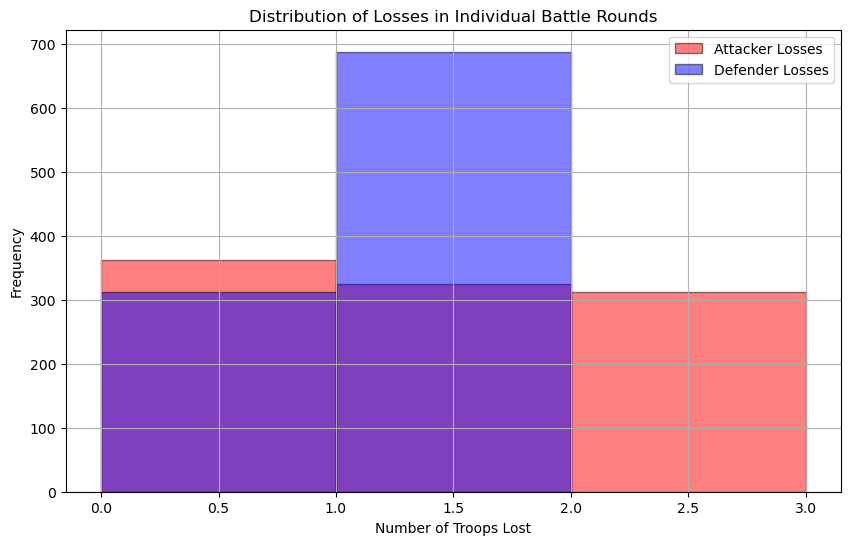

Attacker Wins: 363
Defender Wins: 312
Draws: 325


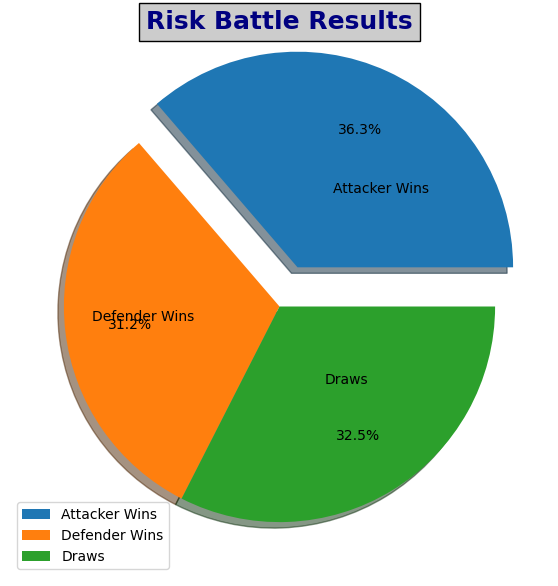

In [14]:
# Simulate 1000 individual rounds.
attacker_wins, defender_wins, draws = simulate_individual_rounds()
pie_chart_results(attacker_wins, defender_wins, draws)

#### Risk - Part 2 -Playing until one side is wiped out
* There is no minimum number of battles.
* I assigned the number of troops to each side to 40.
* Plots a bar chart of troops remaining after the game is finished - Final Troop Counts After Full Battle

In [15]:
# Function to simulate a full battle until one side is wiped out.
def simulate_full_battle(attacker_troops, defender_troops):
    attacker_losses = 0         # Setting attacker's and defender's losses to zero.
    defender_losses = 0
    battle_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    # Open a file to save the full battle results.
    with open("battle_results.txt", "a") as file:
        file.write(f"\nFull Battle Results:\t\tBattle Time: {battle_time}\n\n")

        # Continue battles until one side has no troops left.
        while attacker_troops > 0 and defender_troops > 0:          # battle continues until one side is zero/ lost all his/her troops.
            attacker_dice = roll_dice(min(3, attacker_troops))  # Attacker can roll up to 3 dice.
            defender_dice = roll_dice(min(2, defender_troops))  # Defender can roll up to 2 dice.

            a_losses, d_losses = battle_round(attacker_dice, defender_dice)

            attacker_troops -= a_losses
            defender_troops -= d_losses

            attacker_losses += a_losses
            defender_losses += d_losses

            # Write each round's results to the file.
            file.write(f"Attacker Dice: {attacker_dice}, Defender Dice: {defender_dice}, Attacker Troops: {attacker_troops}, Defender Troops: {defender_troops}\n")

        # Write final troop counts to the file.
        file.write(f"\nFinal Attacker Troops: {attacker_troops}\n")
        file.write(f"Final Defender Troops: {defender_troops}\n")

    # Plotting the final troop counts.
    remaining_troops = [attacker_troops, defender_troops]
    labels = ['Attacker', 'Defender']

    plt.figure(figsize=(10, 6))
    plt.bar(labels, remaining_troops, color=['red', 'blue'], edgecolor='black')

    plt.title("Final Troop Counts After Full Battle")
    plt.ylabel("Number of Troops Remaining")
    plt.grid(axis='y')

    plt.show()

    # Print the final troop counts.
    print(f"Final Attacker Troops: {attacker_troops}")
    print(f"Final Defender Troops: {defender_troops}")


#### Running Risk Game - Part 2

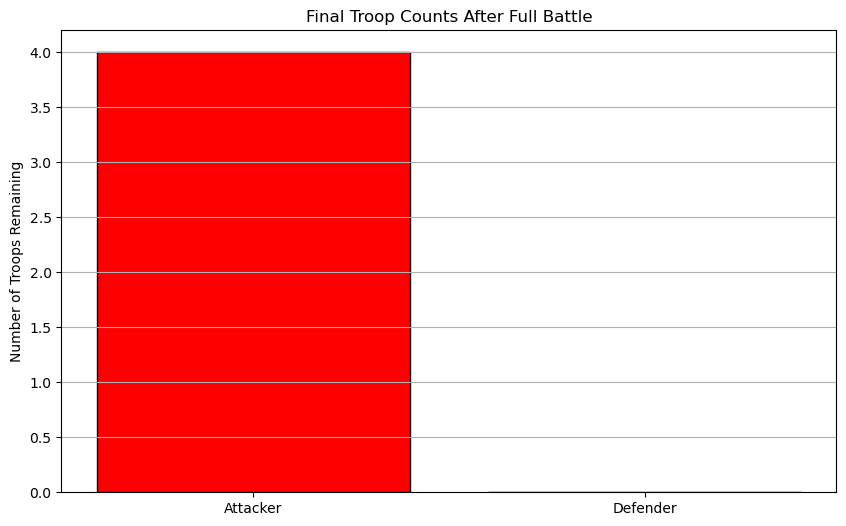

Final Attacker Troops: 4
Final Defender Troops: 0


In [16]:
# Simulate a full battle (attacker starts with 40 troops, defender with 40 troops).
simulate_full_battle(40, 40)

***
### _End_